In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')


import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.datasets as smd
import statsmodels.api as sm

In [2]:
flats = pd.read_csv("flats_moscow.txt", sep='\t')
linear = smf.ols('price ~ totsp+livesp+kitsp+dist+metrdist+walk+brick+floor+code', flats)
l_results = linear.fit()
robust_results = l_results.get_robustcov_results(cov_type="HC3")
print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     146.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          4.25e-213
Time:                        13:23:41   Log-Likelihood:                -9779.0
No. Observations:                2040   AIC:                         1.958e+04
Df Residuals:                    2030   BIC:                         1.963e+04
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.9780     13.118     -1.828      0.0

In [3]:
params = ["Intercept"] + flats.columns.tolist()[2:]
for elem, conf_int_param in zip(params, robust_results.conf_int()):
    if conf_int_param[1] < 0 or conf_int_param[0] > 0:
        print(elem + " : H1, confidence int = " + str(conf_int_param))
    else:
        print(elem + " : H0, confidence int = " + str(conf_int_param))

Intercept : H0, confidence int = [-49.70418638   1.74828195]
totsp : H1, confidence int = [1.14665228 2.00067668]
livesp : H1, confidence int = [0.44781636 2.295442  ]
kitsp : H1, confidence int = [0.33675327 3.14508458]
dist : H1, confidence int = [-3.61782236 -2.72303584]
metrdist : H1, confidence int = [-1.54641964 -0.91994991]
walk : H1, confidence int = [ 6.82044238 11.62137061]
brick : H1, confidence int = [ 3.21976232 10.59055636]
floor : H1, confidence int = [3.92860715 9.17215704]
code : H1, confidence int = [-3.18320779 -2.0846047 ]


In [4]:
pd.DataFrame(
    robust_results.cov_params(),
    index=l_results.params.index, 
    columns=l_results.params.index
)

,Intercept,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
Intercept,172.083099,0.727485,-5.040333,2.444536,-1.243724,-0.330106,-2.815240,6.398283,-1.461743,-0.059492
totsp,0.727485,0.047410,-0.071582,-0.091494,-0.005390,-0.000323,-0.028784,0.080025,-0.000330,-0.001818
livesp,-5.040333,-0.071582,0.221898,-0.007056,0.020751,0.004557,0.065141,-0.378958,0.023943,-0.009932
kitsp,2.444536,-0.091494,-0.007056,0.512652,-0.003734,-0.009876,0.043718,0.314514,-0.083921,0.011844
dist,-1.243724,-0.005390,0.020751,-0.003734,0.052043,0.001137,0.047046,0.112207,-0.013452,0.013648
metrdist,-0.330106,-0.000323,0.004557,-0.009876,0.001137,0.025511,0.004504,0.008496,-0.002729,0.001072
walk,-2.815240,-0.028784,0.065141,0.043718,0.047046,0.004504,1.498222,-0.037720,-0.145615,0.024963
brick,6.398283,0.080025,-0.378958,0.314514,0.112207,0.008496,-0.037720,3.531460,-0.075079,0.035005
floor,-1.461743,-0.000330,0.023943,-0.083921,-0.013452,-0.002729,-0.145615,-0.075079,1.787214,-0.005604
code,-0.059492,-0.001818,-0.009932,0.011844,0.013648,0.001072,0.024963,0.035005,-0.005604,0.078453


In [5]:
totsp_ = 60.
livesp_ = 40.
kitsp_ = 10.
dist = 8.
metrdist = 5.
walk = 1
brick = 1
floor = 1
code = 2

params_list = [totsp_, livesp_, kitsp_, dist, metrdist, walk, brick, floor, code]
columns_list = ["totsp","livesp","kitsp","dist","metrdist","walk","brick","floor","code"]
desired_flat_linear = smf.ols('price ~ totsp+livesp+kitsp+dist+metrdist+walk+brick+floor+code', flats)
desired_flat_results = desired_flat_linear.fit()
desired_robust_results = desired_flat_results.get_robustcov_results(cov_type="HC3")
print(desired_robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.19e-208
Time:                        13:23:45   Log-Likelihood:                -9779.0
No. Observations:                2040   AIC:                         1.958e+04
Df Residuals:                    2030   BIC:                         1.963e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.9780     13.493     -1.777      0.0

In [6]:
pd.DataFrame(
    desired_robust_results.cov_params(),
    index=desired_flat_results.params.index, 
    columns=desired_flat_results.params.index
)

,Intercept,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
Intercept,182.070540,0.782418,-5.373745,2.651962,-1.294865,-0.351268,-2.947218,6.927564,-1.512222,-0.045874
totsp,0.782418,0.049294,-0.075219,-0.094165,-0.005639,-0.000323,-0.029971,0.085686,-0.000502,-0.001714
livesp,-5.373745,-0.075219,0.235472,-0.010952,0.022110,0.005072,0.069440,-0.402975,0.025449,-0.010646
kitsp,2.651962,-0.094165,-0.010952,0.533219,-0.004723,-0.010998,0.043181,0.327409,-0.086539,0.011991
dist,-1.294865,-0.005639,0.022110,-0.004723,0.053177,0.001295,0.048157,0.113119,-0.013671,0.013876
metrdist,-0.351268,-0.000323,0.005072,-0.010998,0.001295,0.026131,0.004649,0.008725,-0.002502,0.001140
walk,-2.947218,-0.029971,0.069440,0.043181,0.048157,0.004649,1.521869,-0.044112,-0.148148,0.025305
brick,6.927564,0.085686,-0.402975,0.327409,0.113119,0.008725,-0.044112,3.633260,-0.077999,0.036700
floor,-1.512222,-0.000502,0.025449,-0.086539,-0.013671,-0.002502,-0.148148,-0.077999,1.813114,-0.005887
code,-0.045874,-0.001714,-0.010646,0.011991,0.013876,0.001140,0.025305,0.036700,-0.005887,0.079844


In [7]:

desired_pred =desired_robust_results.get_prediction(pd.DataFrame([params_list], columns= columns_list))
single_pred = desired_pred.summary_frame(alpha=.05)[['obs_ci_lower','obs_ci_upper']]
desired_pred.summary_frame(alpha=.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,128.595552,3.627374,121.481788,135.709316,70.720534,186.470569


In [8]:
X = np.linspace(np.min(flats['totsp']) - 50, np.max(flats['totsp']) + 200, 1000)
pred = []
lower = []
upper = []
for elem in X:
    pred_buff = desired_robust_results.get_prediction(pd.DataFrame([[elem, *(params_list[1:])]], columns= columns_list))
    frame = pred_buff.summary_frame(alpha=.05)
    pred.append(float(frame['mean']))
    lower.append(float(frame['obs_ci_lower']))
    upper.append(float(frame['obs_ci_upper']))

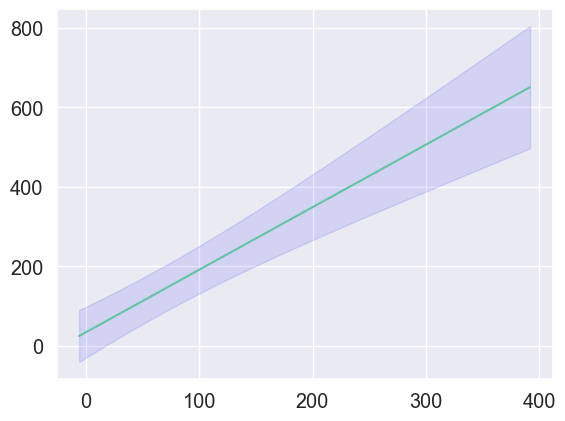

In [9]:
plt.plot(X,pred)
plt.fill_between(X, lower, upper, color='b', alpha=.1)

**Вывод:**

Как и ожидалось, из-за гетероскедастичности разброс увеличивается, тк на исходном распределении дисперсия остатков возрастала

In [28]:
import seaborn as sns

data = pd.read_excel('CTG.xls', sheet_name='Data', header=1)
data = data[data['NSP'] != 2.0]
features = ['NSP','AC','FM', 'UC','DL','DS','DP','ASTV','MSTV','ALTV','MLTV','Width','Min','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']
data = data[features]
data = data.dropna()
data

,NSP,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
1,1.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,1.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,1.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,1.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
5,3.0,1.0,0.0,10.0,9.0,0.0,2.0,26.0,5.9,0.0,...,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,1.0,0.0,0.0,6.0,0.0,0.0,0.0,79.0,0.3,20.0,...,26.0,124.0,150.0,1.0,0.0,144.0,143.0,145.0,1.0,1.0
2118,1.0,0.0,0.0,7.0,1.0,0.0,0.0,79.0,0.5,26.0,...,21.0,129.0,150.0,1.0,0.0,145.0,142.0,145.0,2.0,1.0
2119,1.0,0.0,0.0,6.0,1.0,0.0,0.0,79.0,0.6,27.0,...,26.0,124.0,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0
2120,1.0,0.0,0.0,4.0,1.0,0.0,0.0,77.0,0.7,17.0,...,31.0,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0


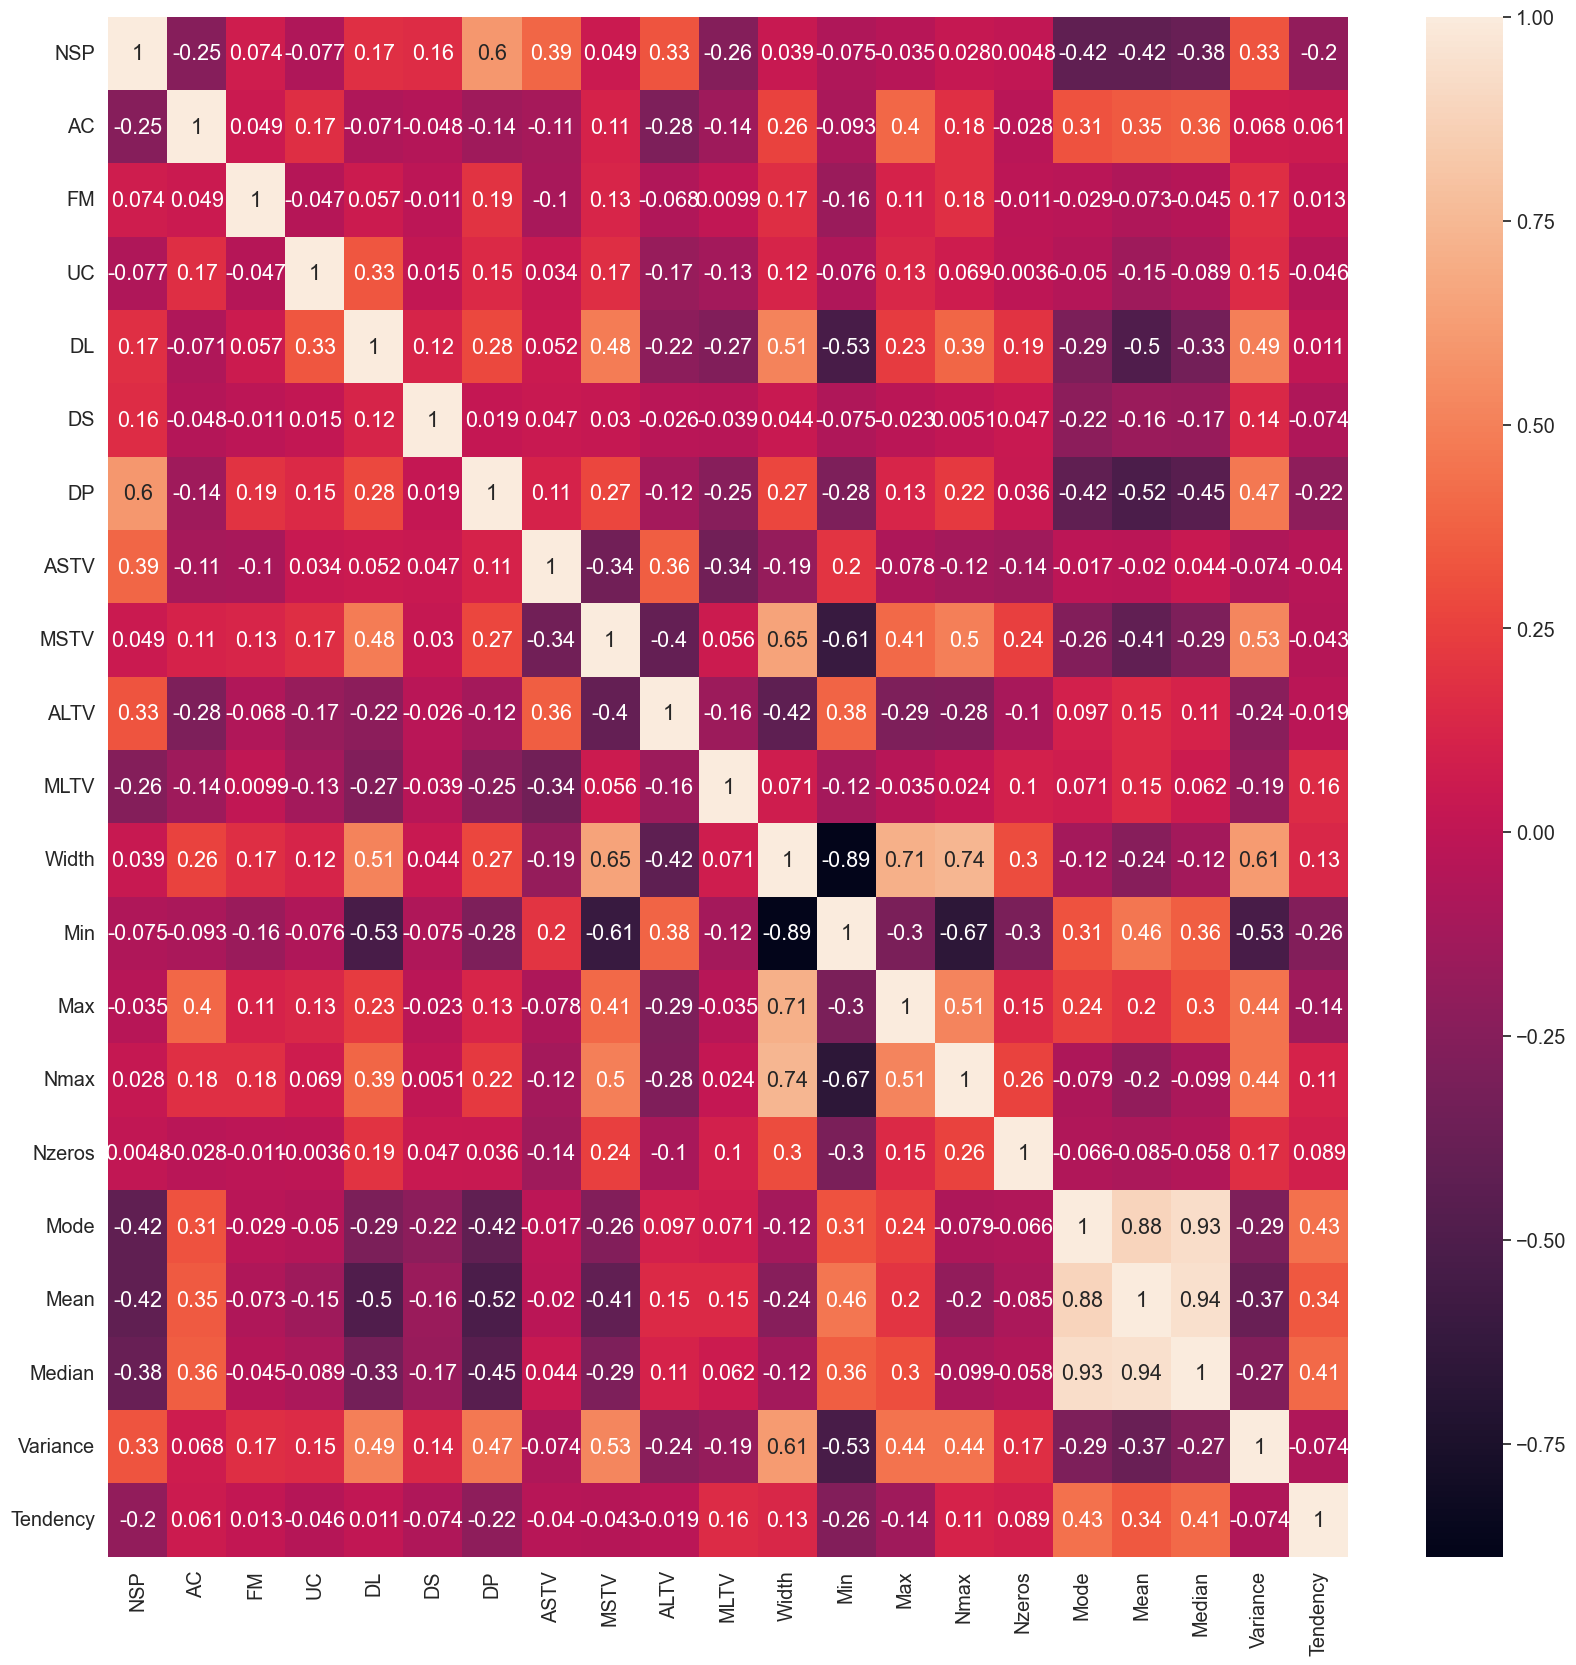

In [41]:
import numpy as np
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [44]:
correlation_matrix_np = np.array(correlation_matrix)
new_features = np.array(data.columns.tolist())[np.abs(correlation_matrix_np[0]) > 0.1]
print(new_features)
data = data[new_features]

['NSP' 'AC' 'DL' 'DS' 'DP' 'ASTV' 'ALTV' 'MLTV' 'Mode' 'Mean' 'Median'
 'Variance' 'Tendency']


In [54]:
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler

new_features_no_nsp = new_features[1:]
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data[new_features_no_nsp])
new_data = pd.DataFrame(np.hstack([np.array(data["NSP"])[:,None], scaled_data]), columns = new_features)

glm_model = sm.formula.glm("NSP ~ " + ("+".join(new_features)), data, family=sm.families.Binomial())
glm_results = glm_model.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    NSP   No. Observations:                 1831
Model:                            GLM   Df Residuals:                     1817
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Mon, 09 Oct 2023   Deviance:                       26535.
Time:                        14:41:24   Pearson chi2:                 3.17e+18
No. Iterations:                     5   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.56e+16   5.05e+06  -3.09e+09      0.0